In [17]:
# First comparison of SCENT single-cell multiome cell type - peak pairs with Onek1k eQTL eGene-eSNP pairs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import numpy as np
import pybedtools

pd.set_option('display.max_columns', None)

## Load data, compare and match cell types

In [2]:
onek1k = pd.read_csv("../onek1k/onek1k.tsv.gz", sep="\t", compression="gzip", index_col=0)
onek1k.head()

,region,chr,start,gene,pvalue,Cell type,Gene ID,Gene Ensembl ID,SNP,Chromosome,Position,SNP assessed allele,eSNP rank,rho correlation coefficient,S-statistics,qvalue,FDR
0,chr10:124955913,chr10,124955913.0,ENSG00000226899,8.653000e-56,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,chr10,126644482,C,eSNP1,-0.473,2.324188e+08,5.108000e-50,0.000022
1,chr10:70203852,chr10,70203852.0,ENSG00000180817,6.308000e-45,B IN,PPA1,ENSG00000180817,rs12355080,chr10,71963608,A,eSNP1,0.428,9.033813e+07,1.646000e-40,0.000022
2,chr10:5813440,chr10,5813440.0,ENSG00000057608,6.764000e-19,B IN,GDI2,ENSG00000057608,rs3736461,chr10,5855403,C,eSNP1,-0.278,2.017159e+08,6.078000e-15,0.000022
3,chr10:13118035,chr10,13118035.0,ENSG00000123240,2.342000e-16,B IN,OPTN,ENSG00000123240,rs57057378,chr10,13160035,A,eSNP1,-0.258,1.984947e+08,2.032000e-12,0.000022
4,chr10:129481527,chr10,129481527.0,ENSG00000170430,3.259000e-12,B IN,MGMT,ENSG00000170430,rs12254582,chr10,131279791,G,eSNP1,-0.220,1.925261e+08,2.150000e-08,0.000022


In [3]:
scent = pd.read_csv("../SCENT/Pubic-PBMC_allqced_bootpkg_nopc_allCT.FDR0.10.txt.gz", sep="\t", compression="gzip")
scent[["chr", "pos_start", "pos_end"]] = scent["peak"].str.split("-", expand=True)
scent.head()

,gene,peak,beta,se,z,p,boot_p,fdr,celltype,chr,pos_start,pos_end
0,ABL2,chr1-178867358-178867980,0.810490,0.193249,4.194015,2.740598e-05,0.00004,0.016217,Bcell,chr1,178867358,178867980
1,ABLIM1,chr10-114540798-114541777,0.715291,0.110496,6.473457,9.578577e-11,0.00004,0.016217,Bcell,chr10,114540798,114541777
2,ABR,chr17-1576741-1577977,0.465925,0.114801,4.058540,4.938037e-05,0.00012,0.038722,Bcell,chr17,1576741,1577977
3,ABT1,chr6-26607255-26607921,1.011734,0.279898,3.614655,3.007477e-04,0.00004,0.016217,Bcell,chr6,26607255,26607921
4,ACAD10,chr12-112075309-112076176,0.937681,0.230274,4.072029,4.660535e-05,0.00008,0.028125,Bcell,chr12,112075309,112076176


In [4]:
print(scent.value_counts(["celltype"]))

onek1k.value_counts(["Cell type"])

celltype
Tnk         7936
Myeloid     7403
Bcell       1235
Name: count, dtype: int64


Cell type
CD4 NC       6473
NK           3672
CD8 ET       3544
CD8 NC       2791
B IN         1834
CD4 ET       1663
B Mem        1430
Mono C       1156
CD8 S100B    1099
Mono NC      1027
DC            560
NK R          548
CD4 SOX4      401
Plasma        399
Name: count, dtype: int64

In [5]:
onek1k["matched_celltype"] = np.select(
    [
        onek1k["Cell type"].isin(["CD4 NC", "CD4 ET", "CD8 NC", "CD8 ET", "CD8 S100B", "CD4 SOX4", "NK", "NK R"]),
        onek1k["Cell type"].isin(["B IN", "B Mem", "Plasma"]),
        onek1k["Cell type"].isin(["Mono C", "Mono NC", "DC"])
    ],
    [
        "Tnk",
        "Bcell",
        "Myeloid",
    ],
    default="None"
)

In [6]:
onek1k = onek1k.drop_duplicates(subset=["region", "chr", "start", "gene", "Gene ID", "matched_celltype", "SNP", "SNP assessed allele"])
onek1k.index = np.arange(1, len(onek1k)+1)
onek1k

,region,chr,start,gene,pvalue,Cell type,Gene ID,Gene Ensembl ID,SNP,Chromosome,Position,SNP assessed allele,eSNP rank,rho correlation coefficient,S-statistics,qvalue,FDR,matched_celltype
1,chr10:124955913,chr10,124955913.0,ENSG00000226899,8.653000e-56,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,chr10,126644482,C,eSNP1,-0.473,2.324188e+08,5.108000e-50,2.164000e-05,Bcell
2,chr10:70203852,chr10,70203852.0,ENSG00000180817,6.308000e-45,B IN,PPA1,ENSG00000180817,rs12355080,chr10,71963608,A,eSNP1,0.428,9.033813e+07,1.646000e-40,2.164000e-05,Bcell
3,chr10:5813440,chr10,5813440.0,ENSG00000057608,6.764000e-19,B IN,GDI2,ENSG00000057608,rs3736461,chr10,5855403,C,eSNP1,-0.278,2.017159e+08,6.078000e-15,2.164000e-05,Bcell
4,chr10:13118035,chr10,13118035.0,ENSG00000123240,2.342000e-16,B IN,OPTN,ENSG00000123240,rs57057378,chr10,13160035,A,eSNP1,-0.258,1.984947e+08,2.032000e-12,2.164000e-05,Bcell
5,chr10:129481527,chr10,129481527.0,ENSG00000170430,3.259000e-12,B IN,MGMT,ENSG00000170430,rs12254582,chr10,131279791,G,eSNP1,-0.220,1.925261e+08,2.150000e-08,2.164000e-05,Bcell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23391,chr6:110634456,chr6,110634456.0,ENSG00000168438,7.005000e-04,Plasma,CDC40,ENSG00000168438,rs13216790,chr6,110955659,A,eSNP5,0.120,7.369711e+07,7.503000e-04,1.663000e-02,Bcell
23392,chr6:73597962,chr6,73597962.0,ENSG00000135297,9.358000e-04,Plasma,MTO1,ENSG00000135297,rs382041,chr6,74307685,G,eSNP5,0.117,7.393319e+07,9.934000e-04,2.612000e-02,Bcell
23393,chr7:76388680,chr7,76388680.0,ENSG00000188372,3.052000e-13,Plasma,ZP3,ENSG00000188372,rs10281089,chr7,76017997,T,eSNP5,-0.255,1.050764e+08,8.133000e-12,2.278000e-07,Bcell
23394,chr7:76404639,chr7,76404639.0,ENSG00000170027,2.630000e-04,Plasma,YWHAG,ENSG00000170027,rs11760803,chr7,76033956,C,eSNP5,-0.129,9.455339e+07,3.261000e-04,2.352000e-03,Bcell


## Convert to bed4 files and liftover (onek1k is in hg19)

In [8]:
onek1k_bed4 = onek1k.reset_index()

onek1k_bed4["pos_end"] = onek1k_bed4["Position"]+1
onek1k_bed4[["Chromosome", "Position", "pos_end", "index"]].to_csv("onek1k_bed4_hg19.bed", sep="\t", header=None, index=None)

In [9]:
!/projects/zhanglab/users/ana/liftover/liftOver onek1k_bed4_hg19.bed \
/projects/zhanglab/users/ana/liftover/hg19ToHg38.over.chain.gz \
onek1k_bed4_hg38.bed unMapped

Reading liftover chains
Mapping coordinates


In [15]:
onek1k_bed4_mapped = pd.read_csv("onek1k_bed4_hg38.bed", header=None, sep="\t")
onek1k_bed4_mapped.columns=["hg38_chr", "pos_start", "pos_end", "index"]
onek1k_merged = onek1k.reset_index().merge(onek1k_bed4_mapped, on="index", how="outer")

In [18]:
onek1k_merged

,index,region,chr,start,gene,pvalue,Cell type,Gene ID,Gene Ensembl ID,SNP,Chromosome,Position,SNP assessed allele,eSNP rank,rho correlation coefficient,S-statistics,qvalue,FDR,matched_celltype,hg38_chr,pos_start,pos_end
0,1,chr10:124955913,chr10,124955913.0,ENSG00000226899,8.653000e-56,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,chr10,126644482,C,eSNP1,-0.473,2.324188e+08,5.108000e-50,2.164000e-05,Bcell,chr10,124955913.0,124955914.0
1,2,chr10:70203852,chr10,70203852.0,ENSG00000180817,6.308000e-45,B IN,PPA1,ENSG00000180817,rs12355080,chr10,71963608,A,eSNP1,0.428,9.033813e+07,1.646000e-40,2.164000e-05,Bcell,chr10,70203852.0,70203853.0
2,3,chr10:5813440,chr10,5813440.0,ENSG00000057608,6.764000e-19,B IN,GDI2,ENSG00000057608,rs3736461,chr10,5855403,C,eSNP1,-0.278,2.017159e+08,6.078000e-15,2.164000e-05,Bcell,chr10,5813440.0,5813441.0
3,4,chr10:13118035,chr10,13118035.0,ENSG00000123240,2.342000e-16,B IN,OPTN,ENSG00000123240,rs57057378,chr10,13160035,A,eSNP1,-0.258,1.984947e+08,2.032000e-12,2.164000e-05,Bcell,chr10,13118035.0,13118036.0
4,5,chr10:129481527,chr10,129481527.0,ENSG00000170430,3.259000e-12,B IN,MGMT,ENSG00000170430,rs12254582,chr10,131279791,G,eSNP1,-0.220,1.925261e+08,2.150000e-08,2.164000e-05,Bcell,chr10,129481527.0,129481528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23390,23391,chr6:110634456,chr6,110634456.0,ENSG00000168438,7.005000e-04,Plasma,CDC40,ENSG00000168438,rs13216790,chr6,110955659,A,eSNP5,0.120,7.369711e+07,7.503000e-04,1.663000e-02,Bcell,chr6,110634456.0,110634457.0
23391,23392,chr6:73597962,chr6,73597962.0,ENSG00000135297,9.358000e-04,Plasma,MTO1,ENSG00000135297,rs382041,chr6,74307685,G,eSNP5,0.117,7.393319e+07,9.934000e-04,2.612000e-02,Bcell,chr6,73597962.0,73597963.0
23392,23393,chr7:76388680,chr7,76388680.0,ENSG00000188372,3.052000e-13,Plasma,ZP3,ENSG00000188372,rs10281089,chr7,76017997,T,eSNP5,-0.255,1.050764e+08,8.133000e-12,2.278000e-07,Bcell,chr7,76388680.0,76388681.0
23393,23394,chr7:76404639,chr7,76404639.0,ENSG00000170027,2.630000e-04,Plasma,YWHAG,ENSG00000170027,rs11760803,chr7,76033956,C,eSNP5,-0.129,9.455339e+07,3.261000e-04,2.352000e-03,Bcell,chr7,76404639.0,76404640.0


In [19]:
(onek1k_merged["start"] == onek1k_merged["pos_start"]).sum()

np.int64(23386)

## Compare gene and SNP/peak coverage

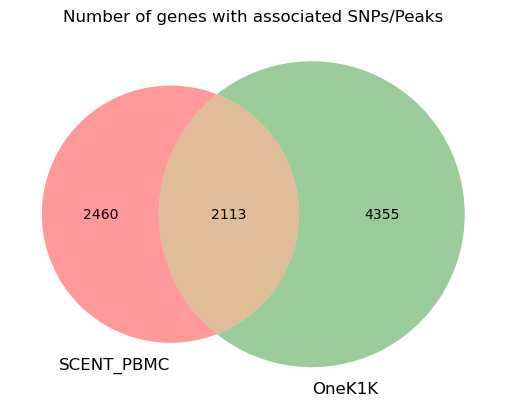

In [28]:
# gene set
venn.venn2((
    set(scent["gene"]), 
    set(onek1k_merged["Gene ID"])
), set_labels=("SCENT_PBMC", "OneK1K"))
plt.title("Number of genes with associated SNPs/Peaks")
plt.show()

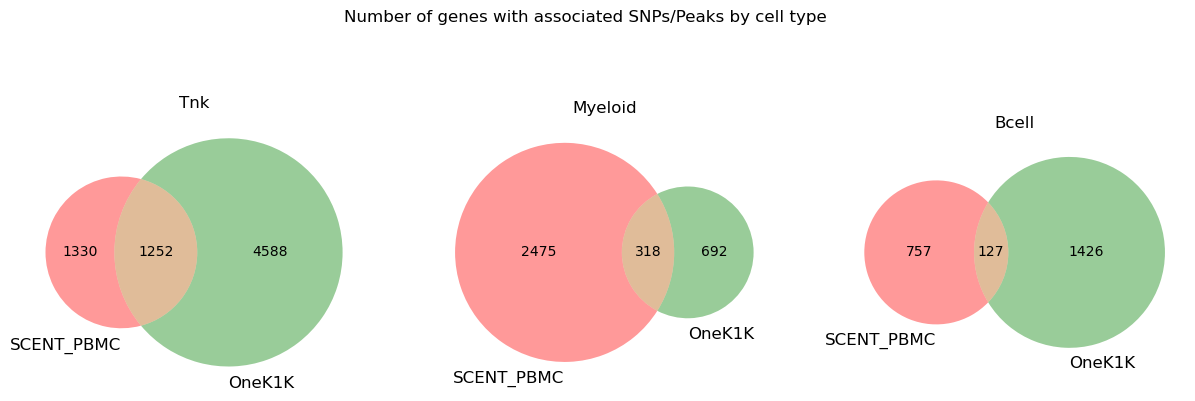

In [34]:
# gene set by cell type
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Number of genes with associated SNPs/Peaks by cell type")
for i, ctype in enumerate(["Tnk", "Myeloid", "Bcell"]):
    venn.venn2((
        set(scent[scent["celltype"]==ctype]["gene"]), 
        set(onek1k_merged[onek1k_merged["matched_celltype"]==ctype]["Gene ID"])
    ), set_labels=("SCENT_PBMC", "OneK1K"), ax=axs[i])
    axs[i].set_title(ctype)
plt.show()

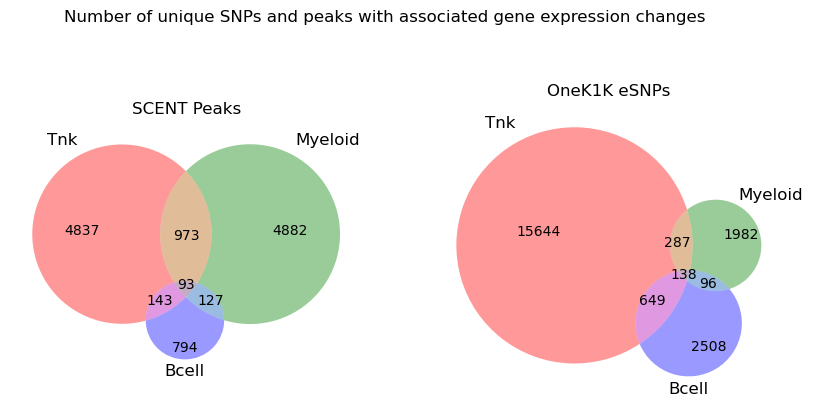

In [55]:
# number of unique SNPs and peaks associated with gene expression changes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Number of unique SNPs and peaks with associated gene expression changes")
celltypes = ["Tnk", "Myeloid", "Bcell"]
venn.venn3(
    list(set(scent[scent["celltype"]==a]["peak"]) for a in celltypes), 
    set_labels=celltypes, ax=axs[0]
)
axs[0].set_title("SCENT Peaks")

venn.venn3(
    list(set(onek1k_merged[onek1k_merged["matched_celltype"]==a]["SNP"]) for a in celltypes), 
    set_labels=celltypes, ax=axs[1]
)
axs[1].set_title("OneK1K eSNPs")
plt.show()

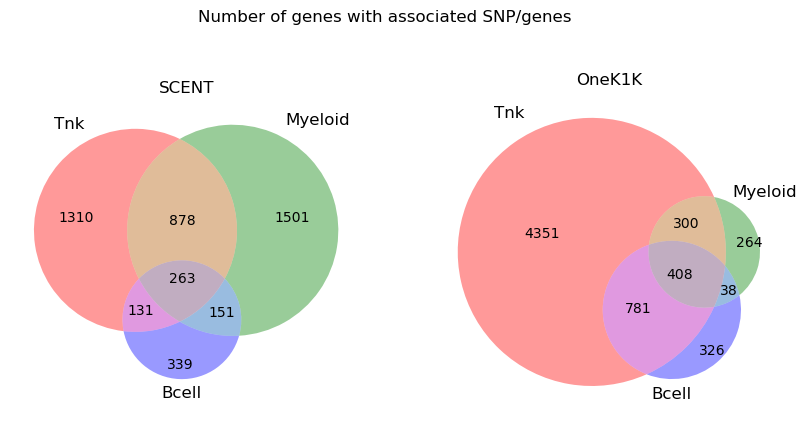

In [56]:
# number of genes with associated SNP/genes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Number of genes with associated SNP/genes")
celltypes = ["Tnk", "Myeloid", "Bcell"]
venn.venn3(
    list(set(scent[scent["celltype"]==a]["gene"]) for a in celltypes), 
    set_labels=celltypes, ax=axs[0]
)
axs[0].set_title("SCENT")

venn.venn3(
    list(set(onek1k_merged[onek1k_merged["matched_celltype"]==a]["Gene ID"]) for a in celltypes), 
    set_labels=celltypes, ax=axs[1]
)
axs[1].set_title("OneK1K")
plt.show()

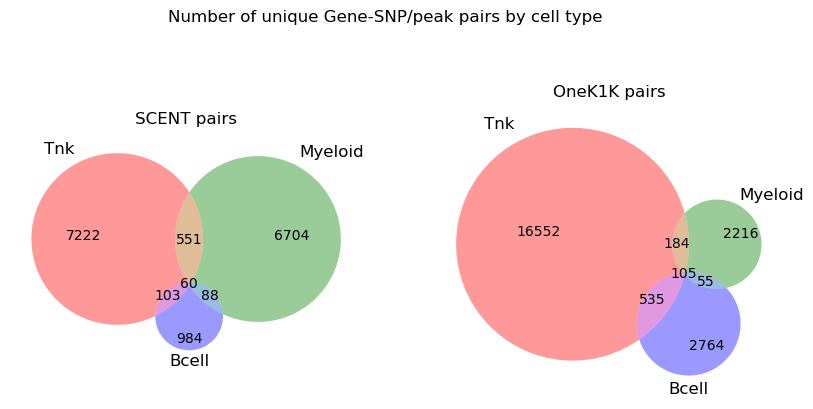

In [58]:
# check pairs
scent["pairs"] = scent["gene"] + "-" + scent["peak"]
onek1k_merged["pairs"] = onek1k_merged["Gene ID"] + "-" + onek1k_merged["SNP"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Number of unique Gene-SNP/peak pairs by cell type")
venn.venn3(
    list(set(scent[scent["celltype"]==a]["pairs"]) for a in celltypes), 
    set_labels=celltypes, ax=axs[0]
)
axs[0].set_title("SCENT pairs")

venn.venn3(
    list(set(onek1k_merged[onek1k_merged["matched_celltype"]==a]["pairs"]) for a in celltypes), 
    set_labels=celltypes, ax=axs[1]
)
axs[1].set_title("OneK1K pairs")
plt.show()

In [61]:
onek1k_merged1 = onek1k_merged.dropna()

In [74]:
same_celltype = np.array(onek1k_merged1['matched_celltype'])[:,np.newaxis] == np.array(scent['celltype'])
same_gene = np.array(onek1k_merged1['Gene ID'])[:,np.newaxis] == np.array(scent['gene'])
same_chrom = np.array(onek1k_merged1['chr'])[:,np.newaxis] == np.array(scent['chr'])
snp_after_peak_start = np.array(onek1k_merged1['pos_start'])[:,np.newaxis] >= np.array(scent['pos_start'].astype(int))
snp_before_peak_end = np.array(onek1k_merged1['pos_start'])[:,np.newaxis] <= np.array(scent['pos_end'].astype(int))

In [75]:
match_pairs_mat = same_celltype & same_gene & same_chrom & snp_after_peak_start & snp_before_peak_end

In [76]:
match_pairs_mat.sum(), (match_pairs_mat.sum(axis=0) > 0).sum(), (match_pairs_mat.sum(axis=1) > 0).sum()

(np.int64(132), np.int64(122), np.int64(132))

In [77]:
np.save("matched_pairs_matrix_onek1k_scent.npy", match_pairs_mat)

In [91]:
len(match_pairs_mat.sum(axis=1))

23386

## sanity check 

In [73]:
match_pairs_chrom_mat = same_celltype & same_gene & same_chrom
match_pairs_chrom_mat.sum(), (match_pairs_chrom_mat.sum(axis=0) > 0).sum(), (match_pairs_chrom_mat.sum(axis=1) > 0).sum()

(np.int64(17365), np.int64(5813), np.int64(4713))

### Hypothesis: eQTLs are often specific to more granular cell types

In [88]:
_onek1k = pd.read_csv("../onek1k/onek1k.tsv.gz", sep="\t", compression="gzip", index_col=0)
_onek1k["matched_celltype"] = np.select(
    [
        _onek1k["Cell type"].isin(["CD4 NC", "CD4 ET", "CD8 NC", "CD8 ET", "CD8 S100B", "CD4 SOX4", "NK", "NK R"]),
        _onek1k["Cell type"].isin(["B IN", "B Mem", "Plasma"]),
        _onek1k["Cell type"].isin(["Mono C", "Mono NC", "DC"])
    ],
    [
        "Tnk",
        "Bcell",
        "Myeloid",
    ],
    default="None"
)
onek1k_dups = _onek1k.duplicated(subset=["region", "chr", "start", "gene", "Gene ID", "matched_celltype", "SNP", "SNP assessed allele"])
onek1k_dups = _onek1k.loc[onek1k_dups].drop_duplicates(subset=["chr", "start", "Gene ID", "matched_celltype"])

In [92]:
onek1k_matched_subset = onek1k_merged1.loc[np.where(match_pairs_mat.sum(axis=1))]
onek1k_matched_subset

,index,region,chr,start,gene,pvalue,Cell type,Gene ID,Gene Ensembl ID,SNP,Chromosome,Position,SNP assessed allele,eSNP rank,rho correlation coefficient,S-statistics,qvalue,FDR,matched_celltype,hg38_chr,pos_start,pos_end,pairs
108,109,chr12:66187097,chr12,66187097.0,ENSG00000090376,2.810000e-10,B IN,IRAK3,ENSG00000090376,rs2701652,chr12,66580877,G,eSNP1,-0.200,1.893223e+08,5.096000e-07,1.545000e-05,Bcell,chr12,66187097.0,66187098.0,IRAK3-rs2701652
1275,1276,chr3:122066784,chr3,122066784.0,ENSG00000114013,6.925000e-12,B IN,CD86,ENSG00000114013,rs2681411,chr3,121785631,A,eSNP2,0.217,1.236485e+08,3.228000e-08,1.848000e-05,Bcell,chr3,122066784.0,122066785.0,CD86-rs2681411
1654,1655,chr5:181051190,chr5,181051190.0,ENSG00000165810,1.672000e-12,B IN,BTNL9,ENSG00000165810,rs9686314,chr5,180478190,G,eSNP4,0.223,1.226755e+08,6.022000e-12,1.279000e-07,Bcell,chr5,181051190.0,181051191.0,BTNL9-rs9686314
1931,1932,chr12:10723460,chr12,10723460.0,ENSG00000060138,4.731000e-07,B Mem,YBX3,ENSG00000060138,rs12317203,chr12,10876059,T,eSNP1,-0.160,1.830646e+08,7.404000e-04,6.992000e-03,Bcell,chr12,10723460.0,10723461.0,YBX3-rs12317203
3291,3292,chr11:61026250,chr11,61026250.0,ENSG00000013725,1.720000e-22,CD4 NC,CD6,ENSG00000013725,rs4939491,chr11,60793722,A,eSNP1,-0.304,2.058599e+08,1.322000e-19,2.211000e-06,Tnk,chr11,61026250.0,61026251.0,CD6-rs4939491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22163,22164,chr21:46142718,chr21,46142718.0,ENSG00000160299,3.874000e-04,NK,PCNT,ENSG00000160299,rs4819206,chr21,47562632,C,eSNP2,-0.113,1.756650e+08,4.136000e-03,1.353000e-02,Tnk,chr21,46142718.0,46142719.0,PCNT-rs4819206
22178,22179,chr22:43171539,chr22,43171539.0,ENSG00000100300,3.348000e-04,NK,TSPO,ENSG00000100300,rs2071728,chr22,43567545,A,eSNP2,-0.114,1.758560e+08,2.445000e-03,3.974000e-02,Tnk,chr22,43171539.0,43171540.0,TSPO-rs2071728
22287,22288,chr5:39287804,chr5,39287804.0,ENSG00000082074,4.834000e-05,NK,FYB,ENSG00000082074,rs575551,chr5,39287906,C,eSNP2,0.129,1.374217e+08,7.533000e-04,4.446000e-03,Tnk,chr5,39287804.0,39287805.0,FYB-rs575551
22510,22511,chr17:46290846,chr17,46290846.0,ENSG00000262372,6.598000e-14,NK,RP11-669E14.6,ENSG00000262372,rs2957297,chr17,44368212,A,eSNP3,-0.236,1.950916e+08,3.403000e-12,9.767000e-08,Tnk,chr17,46290846.0,46290847.0,RP11-669E14.6-rs2957297


In [93]:
onek1k_dups.merge(onek1k_matched_subset, how='inner', on=["chr", "start", "Gene ID", "matched_celltype"])

,region_x,chr,start,gene_x,pvalue_x,Cell type_x,Gene ID,Gene Ensembl ID_x,SNP_x,Chromosome_x,Position_x,SNP assessed allele_x,eSNP rank_x,rho correlation coefficient_x,S-statistics_x,qvalue_x,FDR_x,matched_celltype,index,region_y,gene_y,pvalue_y,Cell type_y,Gene Ensembl ID_y,SNP_y,Chromosome_y,Position_y,SNP assessed allele_y,eSNP rank_y,rho correlation coefficient_y,S-statistics_y,qvalue_y,FDR_y,hg38_chr,pos_start,pos_end,pairs
0,chr12:44847987,chr12,44847987.0,ENSG00000184613,9.498000e-08,CD4 ET,NELL2,ENSG00000184613,rs2658954,chr12,45241770,A,eSNP1,0.169,1.311126e+08,9.576000e-05,8.599000e-04,Tnk,3495,chr12:44847987,ENSG00000184613,1.675000e-28,CD4 NC,ENSG00000184613,rs2658954,chr12,45241770,A,eSNP1,0.343,1.036852e+08,3.289000e-25,2.555000e-06,chr12,44847987.0,44847988.0,NELL2-rs2658954
1,chr16:1964833,chr16,1964833.0,ENSG00000140988,2.181000e-37,CD4 ET,RPS2,ENSG00000140988,rs17135718,chr16,2014834,G,eSNP1,0.392,9.598473e+07,3.746000e-33,1.336000e-05,Tnk,4070,chr16:1964833,ENSG00000140988,2.614000e-49,CD4 NC,ENSG00000140988,rs17135718,chr16,2014834,G,eSNP1,0.447,8.734363e+07,1.113000e-45,3.430000e-06,chr16,1964833.0,1964834.0,RPS2-rs17135718
2,chr19:55385959,chr19,55385959.0,ENSG00000108107,9.649000e-168,CD4 ET,RPL28,ENSG00000108107,rs17700376,chr19,55897327,G,eSNP1,-0.735,2.738776e+08,3.642000e-161,1.759000e-05,Tnk,4580,chr19:55385959,ENSG00000108107,1.615000e-201,CD4 NC,ENSG00000108107,rs17700376,chr19,55897327,G,eSNP1,-0.780,2.808955e+08,2.557000e-195,3.505000e-06,chr19,55385959.0,55385960.0,RPL28-rs17700376
3,chr19:543497,chr19,543497.0,ENSG00000197540,2.543000e-10,CD4 ET,GZMM,ENSG00000197540,rs16990714,chr19,543497,T,eSNP1,-0.200,1.893977e+08,5.758000e-07,1.759000e-05,Tnk,4641,chr19:543497,ENSG00000197540,3.857000e-19,CD4 NC,ENSG00000197540,rs16990714,chr19,543497,T,eSNP1,-0.280,2.020115e+08,4.980000e-16,3.505000e-06,chr19,543497.0,543498.0,GZMM-rs16990714
4,chr21:46622601,chr21,46622601.0,ENSG00000160310,9.927000e-27,CD4 ET,PRMT2,ENSG00000160310,rs11910707,chr21,48042513,T,eSNP1,0.332,1.053970e+08,1.687000e-23,4.282000e-06,Tnk,5394,chr21:46622601,ENSG00000160310,3.905000e-67,CD4 NC,ENSG00000160310,rs11910707,chr21,48042513,T,eSNP1,0.513,7.680173e+07,8.700000e-64,1.601000e-06,chr21,46622601.0,46622602.0,PRMT2-rs11910707
5,chr2:241111131,chr2,241111131.0,ENSG00000115687,1.177000e-43,CD4 ET,PASK,ENSG00000115687,rs3815296,chr2,242050546,G,eSNP1,-0.422,2.244116e+08,6.875000e-40,6.171000e-06,Tnk,5597,chr2:241111131,ENSG00000115687,2.568000e-82,CD4 NC,ENSG00000115687,rs3815296,chr2,242050546,G,eSNP1,-0.560,2.462881e+08,9.159000e-79,1.737000e-06,chr2,241111131.0,241111132.0,PASK-rs3815296
6,chr4:142704109,chr4,142704109.0,ENSG00000109452,1.556000e-06,CD4 ET,INPP4B,ENSG00000109452,rs1373036,chr4,143625262,A,eSNP1,0.153,1.337442e+08,7.752000e-04,9.546000e-03,Tnk,6154,chr4:142704109,ENSG00000109452,5.329000e-23,CD4 NC,ENSG00000109452,rs1373036,chr4,143625262,A,eSNP1,0.308,1.092418e+08,3.654000e-20,2.139000e-06,chr4,142704109.0,142704110.0,INPP4B-rs1373036
7,chr5:56148856,chr5,56148856.0,ENSG00000164512,5.260000e-12,CD4 ET,ANKRD55,ENSG00000164512,rs7731626,chr5,55444683,A,eSNP1,-0.218,1.921970e+08,6.317000e-09,9.035000e-06,Tnk,6281,chr5:56148856,ENSG00000164512,1.531000e-58,CD4 NC,ENSG00000164512,rs7731626,chr5,55444683,A,eSNP1,-0.483,2.340613e+08,4.420000e-55,2.619000e-06,chr5,56148856.0,56148857.0,ANKRD55-rs7731626
8,chr5:147782912,chr5,147782912.0,ENSG00000176049,1.897000e-10,CD4 ET,JAKMIP2,ENSG00000176049,rs2436340,chr5,147162475,A,eSNP1,0.201,1.260367e+08,1.840000e-07,9.035000e-06,Tnk,6283,chr5:147782912,ENSG00000176049,3.346000e-55,CD4 NC,ENSG00000176049,rs2436340,chr5,147162475,A,eSNP1,0.470,8.359430e+07,8.462000e-52,2.619000e-06,chr5,147782912.0,147782913.0,JAKMIP2-rs2436340
9,chr5:111230662,chr5,111230662.0,ENSG00000152495,4.658000e-09,CD4 ET,CAMK4,ENSG00000152495,rs114378220,chr5,110566360,T,eSNP1,-0.186,1.871167e+08,3.908000e-06,9.035000e-06,Tnk,6304,chr5:111230662,ENSG00000152495,3.571000e-23,CD4 NC,ENSG00000152495,rs

In [96]:
_onek1k.shape

(26597, 18)

In [95]:
_onek1k.FDR.max()

np.float64(0.04999)